## MEGA MART DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = ".............../project_transactions.csv"

In [3]:
cols = ["household_key", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]
dtypes = {"DAY":"Int16", "QUANTITY":"Int32","STORE_ID":"Int32"}

transactions = pd.read_csv(path,dtype = dtypes, usecols= cols)

In [4]:
transactions.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     int64  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(1), float64(1), int64(3)
memory usage: 81.9 MB


In [5]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
0,1364,26984896261,1,842930,1,2.19
1,1364,26984896261,1,897044,1,2.99
2,1364,26984896261,1,920955,1,3.09
3,1364,26984896261,1,937406,1,2.50
4,1364,26984896261,1,981760,1,0.60


In [6]:
transactions = transactions.assign(
    date = (pd.to_datetime("2016", format= "%Y")
           + pd.to_timedelta(transactions["DAY"].astype(str) + " days"))
).drop(["DAY"], axis=1)


In [7]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-02
1,1364,26984896261,897044,1,2.99,2016-01-02
2,1364,26984896261,920955,1,3.09,2016-01-02
3,1364,26984896261,937406,1,2.50,2016-01-02
4,1364,26984896261,981760,1,0.60,2016-01-02


### Time based Analysis
* Plot the sum of sales by month. Are sales growing over time?
* Plot the series after filtering down to dates April 2016 and October 2017.
* Plot the sum of sales 2016 vs 2017 sales.
* Plot total sales by day of week

<AxesSubplot:xlabel='date'>

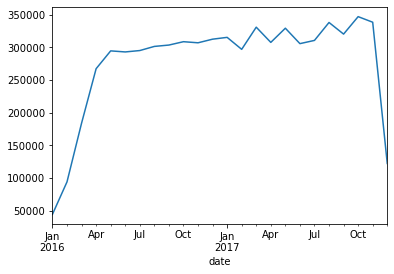

In [8]:
# Sum of sales by month.
(transactions.set_index("date")
    .loc[:,"SALES_VALUE"]
     .resample("M")
     .sum()
     .plot()
)

<AxesSubplot:xlabel='date'>

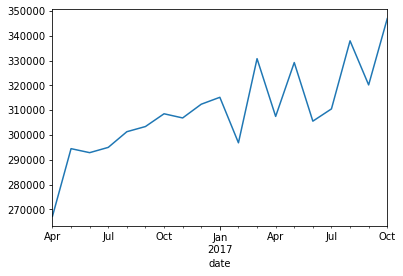

In [9]:
# Sum of sales between April 2016 and Octobere 2017
(transactions.set_index("date")
    .loc["2016-04":"2017-10","SALES_VALUE"]
     .resample("M")
     .sum()
     .plot()
)

<AxesSubplot:xlabel='date'>

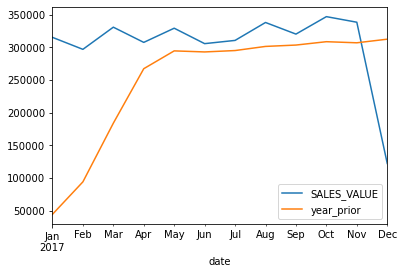

In [10]:
# Sum of sales 2016 vs 2017
(transactions.set_index("date")
    .loc[:,["SALES_VALUE"]]
     .resample("M")
     .sum()
     .assign(year_prior = lambda x:x["SALES_VALUE"].shift(12))
     .loc["2017"]
     .plot()
)

<AxesSubplot:xlabel='date'>

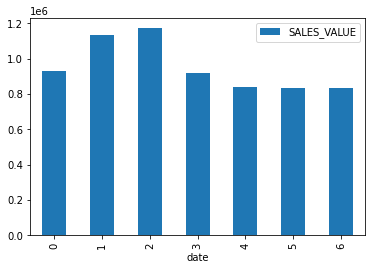

In [11]:
# Total sales by day of week
(transactions
    .groupby(transactions["date"].dt.dayofweek)
     .agg({"SALES_VALUE":"sum"})
).plot.bar()

### Demographics

In [19]:
dem_cols = ["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC"]
dem_dtypes = {"AGE_DESC":"category","INCOME_DESC":"category","HH_COMP_DESC":"category"}

demographics = pd.read_csv(".........../hh_demographic.csv",
                          usecols = dem_cols,
                          dtype = dem_dtypes)

In [20]:
demographics.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [21]:
demographics.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 10.9 KB


In [24]:
# Sum of sales value by household
household_sales = transactions.groupby("household_key").agg({"SALES_VALUE":"sum"})
household_sales

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [26]:
# Using inner join to merge household_sales series and demographics dataframe
household_sales_demo = (
    household_sales.merge(
    demographics, how = "inner",
    left_on = "household_key",
    right_on = "household_key"
    )
)

household_sales_demo

,household_key,SALES_VALUE,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1,4330.16,65+,35-49K,2 Adults No Kids
1,7,3400.05,45-54,50-74K,2 Adults No Kids
2,8,5534.97,25-34,25-34K,2 Adults Kids
3,13,13190.92,25-34,75-99K,2 Adults Kids
4,16,1512.02,45-54,50-74K,Single Female
...,...,...,...,...,...
663,2087,7832.74,45-54,100-124K,Unknown
664,2088,4905.71,25-34,35-49K,Single Female
665,2092,2290.54,35-44,Under 15K,1 Adult Kids
666,2094,3055.52,45-54,50-74K,2 Adults No Kids


In [27]:
household_sales_demo.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   household_key  668 non-null    int64   
 1   SALES_VALUE    668 non-null    float64 
 2   AGE_DESC       668 non-null    category
 3   INCOME_DESC    668 non-null    category
 4   HH_COMP_DESC   668 non-null    category
dtypes: category(3), float64(1), int64(1)
memory usage: 19.8 KB


<AxesSubplot:xlabel='AGE_DESC'>

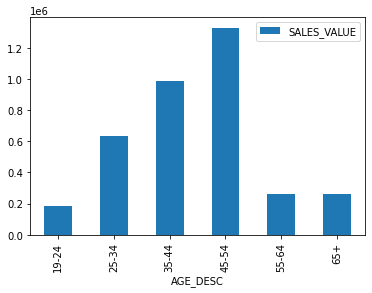

In [30]:
# Plot Sum of sales value by age category
(
    household_sales_demo.groupby(["AGE_DESC"])
    .agg({"SALES_VALUE":"sum"})
    .plot.bar()
)

<AxesSubplot:xlabel='INCOME_DESC'>

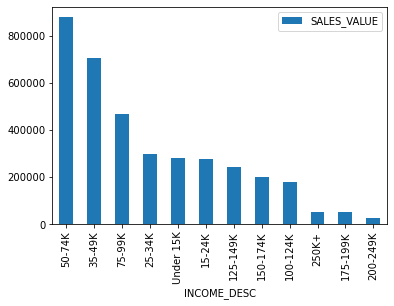

In [31]:
# Plot Sum of sales value by income
(
    household_sales_demo.groupby(["INCOME_DESC"])
    .agg({"SALES_VALUE":"sum"})
    .sort_values("SALES_VALUE", ascending = False)
    .plot.bar()
)

In [35]:
# Pivot table to see average sales on the basis of age description and households
(
    household_sales_demo.pivot_table(index="AGE_DESC",
                                     columns="HH_COMP_DESC",
                                     values="SALES_VALUE",
                                     aggfunc="mean",
                                     margins=True)
    .style.background_gradient(cmap="RdYlGn", axis=None)
)

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


In [36]:
del [household_sales_demo, household_sales]

### Product Demograaphics

In [40]:
product_cols = ["PRODUCT_ID", "DEPARTMENT"]
product_dtypes = (
    {
        "PROODUCT_ID":"Int32",
        "DEPARTMENT":"category"
    }
)

product = pd.read_csv("................./Pandas Course Resources/project_data/product.csv",
                     usecols = product_cols,
                     dtype = dtypes)

In [41]:
product.head()

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY


In [42]:
product.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PRODUCT_ID  92353 non-null  int64 
 1   DEPARTMENT  92353 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.4 MB


In [46]:
# Merging prodct dataframe to transactions and demographics tables, performing an inner join
trans_demo_dept = (
    transactions
    .merge(demographics,
          how = "inner",
           left_on = "household_key",
           right_on = "household_key"
          ).merge(
                product,
                how = "inner",
                left_on = "PRODUCT_ID",
                right_on = "PRODUCT_ID"
            )
)
trans_demo_dept

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT
0,1364,26984896261,842930,1,2.19,2016-01-02,65+,100-124K,Single Female,GROCERY
1,304,27950201718,842930,1,1.67,2016-03-22,25-34,50-74K,2 Adults No Kids,GROCERY
2,575,34186568032,842930,1,1.67,2017-04-30,35-44,50-74K,Single Female,GROCERY
3,77,28023861855,842930,3,5.00,2016-03-28,35-44,100-124K,2 Adults Kids,GROCERY
4,454,42136182098,842930,1,1.67,2017-11-30,55-64,35-49K,Single Male,GROCERY
...,...,...,...,...,...,...,...,...,...,...
1161570,540,41413346731,913709,1,10.99,2017-10-07,25-34,50-74K,Single Female,DRUG GM
1161571,540,41587471481,1024615,1,11.99,2017-10-20,25-34,50-74K,Single Female,DRUG GM
1161572,540,41587471481,9831733,1,0.00,2017-10-20,25-34,50-74K,Single Female,DRUG GM
1161573,540,41834711355,830676,1,8.99,2017-11-08,25-34,50-74K,Single Female,NUTRITION


In [47]:
trans_demo_dept.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161575 entries, 0 to 1161574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   household_key  1161575 non-null  int64         
 1   BASKET_ID      1161575 non-null  int64         
 2   PRODUCT_ID     1161575 non-null  int64         
 3   QUANTITY       1161575 non-null  Int32         
 4   SALES_VALUE    1161575 non-null  float64       
 5   date           1161575 non-null  datetime64[ns]
 6   AGE_DESC       1161575 non-null  category      
 7   INCOME_DESC    1161575 non-null  category      
 8   HH_COMP_DESC   1161575 non-null  category      
 9   DEPARTMENT     1161575 non-null  object        
dtypes: Int32(1), category(3), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 133.0 MB


In [53]:
# Pivot age and department, calculating sum of sales
(
    trans_demo_dept.pivot_table(
        index="DEPARTMENT",
        columns="AGE_DESC",
        values="SALES_VALUE",
        aggfunc="sum"
    )
    .style.background_gradient(cmap="RdYlGn", axis=1)
)

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,0.000000,16.370000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000
DELI/SNACK BAR,0.000000,0.000000,6.980000,1.560000,0.000000,3.310000
